In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics, linear_model
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pypredictbandgaps.material import Material
from pypredictbandgaps.bandgappredictions import BandGapPredictions

Connection established to Materials Project database, version 2020_09_08.


In [2]:
Cd2Se3 = Material(formula="Cd2Se3",spacegroup="F-43m",a=3.95,b=3.95,c=3.95,alpha=59.99,beta=59.99,gamma=59.99,volume=45) # mp-1219182
Cd25Se80 = Material(formula="Cd25Se80",spacegroup="F-43m",a=3,b=3,c=3,alpha=59.99,beta=59.99,gamma=59.99,volume=45) # mp-1219182

Si2Ge3 = Material(formula="Si2Ge3",spacegroup="F-43m",a=4.12,b=4.12,c=4.12,alpha=59.99,beta=59.99,gamma=59.99,volume=45) # mp-1219182
Si82Ge17 = Material(formula="Si82Ge17",spacegroup="F-43m",a=3.98,b=3.98,c=3.98,alpha=59.99,beta=59.99,gamma=59.99,volume=45) # mp-1219182
#Si2Ge4 = Material(formula="Si2Ge4")
#Si5Ge2 = Material(formula="Si5Ge2")
#Cu = Material(formula="Cu",a=1,b=1,c=2,alpha=90,beta=90,gamma=90,volume=11.1)

In [3]:
#materials_list = [Si2Ge3,Si82Ge17]#[SiGe,Si2Ge4,Si5Ge2]
materials_list = [Cd2Se3,Si82Ge17]#[SiGe,Si2Ge4,Si5Ge2]
band_gap_predictions = BandGapPredictions(materials_list,model_type="decision_tree")
band_gap_prediction_objects = band_gap_predictions.band_gap_prediction_objects


Starting prediciton for Cd2Se3 using decision_tree model type...
Material training params: ['spacegroup', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'volume', 'Cd', 'Se', 'molecular_weight']

Getting Materials Project data for the chemical system: Cd-Se ...
Number of Cd-Se system entries in Materials Project: 5
Number of results for training: 5


C:\Users\emily\Anaconda3\lib\site-packages\pymatgen\io\cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Training the model...
training params= ['spacegroup', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'volume', 'Cd', 'Se', 'molecular_weight']
Making predictions...
predicted bandgap for  Cd2Se3 : 0.5095

Starting prediciton for Si82Ge17 using decision_tree model type...
Material training params: ['spacegroup', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'volume', 'Si', 'Ge', 'molecular_weight']

Getting Materials Project data for the chemical system: Ge-Si ...
Number of Ge-Si system entries in Materials Project: 6
Number of results for training: 6


C:\Users\emily\Anaconda3\lib\site-packages\pymatgen\io\cif.py:1123: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Training the model...
training params= ['spacegroup', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'volume', 'Si', 'Ge', 'molecular_weight']
Making predictions...
predicted bandgap for  Si82Ge17 : 0.8585000000000003


In [6]:
#model score: {band_gap_prediction_object.model_score}
for material, band_gap_prediction_object in band_gap_prediction_objects.items():
    x = band_gap_prediction_object.X_train
    y = band_gap_prediction_object.y_train
    band_gap = band_gap_prediction_object.predicted_band_gap
    score = band_gap_prediction_object.model.score(x,y)
    #mse = metrics.mean_squared_error(y, band_gap)
    print(f""" 
    {material}
    -----------
    R-squared: {score}
    band gap: {band_gap} eV""")

 
    Cd2Se3
    -----------
    R-squared: 0.08612066868745072
    band gap: 0.5095 eV
 
    Si82Ge17
    -----------
    R-squared: -88.29052700816658
    band gap: 0.8585000000000003 eV


In [5]:
from pymatgen.ext.matproj import MPRester
mpr = MPRester()

Connection established to Materials Project database, version 2020_09_08.


In [6]:
elements = ["Si","Ge","Cd","Se"]
properties = ["material_id","pretty_formula","band_gap","spacegroup","cif"]

for element in elements:
    results = mpr.query(criteria=element,properties=properties)
    band_gaps = [ result["band_gap"] for result in results if result["band_gap"] ]
    print(f"average {element} bandgap:", np.average(band_gaps),"eV")

average Si bandgap: 0.7591789473684211 eV
average Ge bandgap: 0.6050250000000001 eV


C:\Users\emily\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\emily\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


average Cd bandgap: nan eV
average Se bandgap: 1.44546 eV


C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


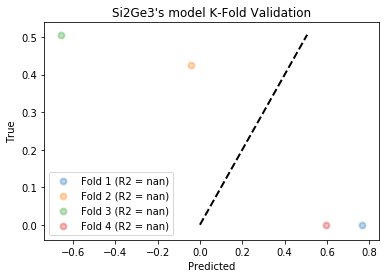

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


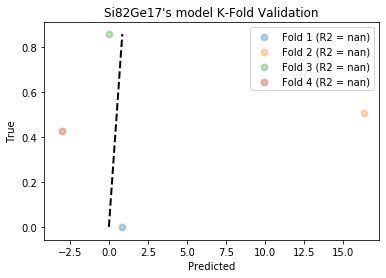

In [5]:
# K fold validation
# https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
for material, band_gap_prediction_object in band_gap_prediction_objects.items():
    scores = list()
    cv = model_selection.KFold(n_splits=4, shuffle=True)
    fig = plt.figure()
    i = 1

    X_train = band_gap_prediction_object.X_train
    y_train = band_gap_prediction_object.y_train
    model = band_gap_prediction_object.model
    
    for train, test in cv.split(X_train, y_train):
        prediction = model.fit(X_train[train],
                        y_train[train]).predict(X_train[test])
        true = y_train[test]
        score = metrics.r2_score(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3, 
                    label='Fold %d (R2 = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
                linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{material}'s model K-Fold Validation")
    plt.legend()
    plt.show()

In [7]:
feature_names = band_gap_prediction_objects["Cd2Se3"].band_gap_dataframe_obj.dataframe.keys()[2:]
feature_names

Index(['spacegroup', 'a', 'b', 'c', 'Cd', 'Se'], dtype='object')

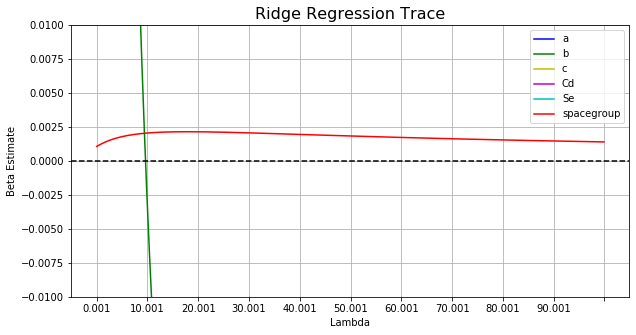

In [14]:
coef = band_gap_prediction_objects["Cd2Se3"].model_weights 

ridge_df = pd.DataFrame({'variable': feature_names, 'weights': coef})
ridge_train_pred = []
ridge_test_pred = []

X_train = band_gap_prediction_objects["Cd2Se3"].X_train
y_train = band_gap_prediction_objects["Cd2Se3"].y_train
X_test = band_gap_prediction_objects["Cd2Se3"].X_test
y_test = band_gap_prediction_objects["Cd2Se3"].y_test

alphas = np.arange(1e-3,1e2,0.1)

for alpha in alphas:
    ridge_reg = linear_model.Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()
del ridge_df['weights']
ridge_df = ridge_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(10, 5))
#ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.plot(
    ridge_df.a, "b",
    ridge_df.b, "g",
    ridge_df.c, "y",
    ridge_df.Cd, "m",
    ridge_df.Se, "c",
    ridge_df.spacegroup, "r",
)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=["a","b","c","Cd","Se","spacegroup"])
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.set_ylim(-0.01,0.01)
ax.grid(True)

In [7]:
# features that are the least efficient in your estimation will "shrink" the fastest
# the faster a coefficient is shrinking the less important it is in prediction